In [2]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /tmp/matplotlib-k6jxhgy3 because the default path (/home/jupyter-ikharitonov/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
frequency = 10  # Frequency in Hz (A4 note)
duration = 1  # Duration in seconds
sample_rate = 10000  # Sample rate in Hz

t = np.linspace(0, duration, int(sample_rate*duration), endpoint=False)
y = np.sin(2 * np.pi * frequency * t)

(0.0, 1.0)

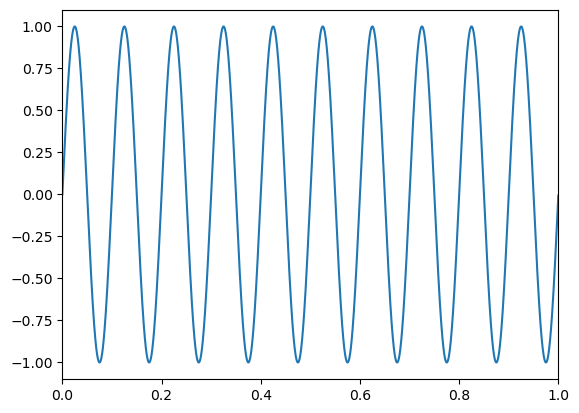

In [4]:
plt.plot(t,y)
plt.xlim([0,1])

In [5]:
# https://dsp.stackexchange.com/questions/81140/how-can-i-generate-a-sine-wave-with-time-varying-frequency-that-is-continuous-in

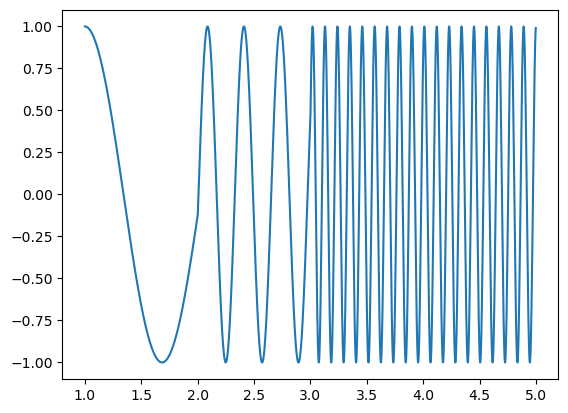

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

dt = 0.001 # time step
# define the three frequencies in radians per sample
omegaT1 = 2*np.pi*.73*dt
omegaT2 = 2*np.pi*3.1*dt
omegaT3 = 2*np.pi*9.083*dt


x=np.arange(1,5,0.001)
y=list()
phi = 0; # phase accumulator
for i in range(0,len(x)):
    c = np.cos(phi) # cosine of current phase
    y.append(c)
    # increment phase based on current frequency
    if x[i]<2:
       phi = phi + omegaT1
    elif x[i]<3:
       phi = phi + omegaT2
    else:
       phi = phi + omegaT3

plt.plot(x, y)
plt.show()

In [31]:
# FUNCTIONS
def generate_acceleration_and_velocity(samples, initial_velocity = 1):
    
    acceleration = np.around(np.random.normal(0,1, samples), 2)
    
    velocity = [initial_velocity]
    const = 0.1
    for i in range(acceleration.shape[0]):
        velocity.append(velocity[-1] + const*acceleration[i])
    
    return acceleration, velocity

def generate_variable_sine(samples, velocity):
    def get_freq_per_sample(rad_angle, dt):
        return 2 * np.pi * rad_angle * dt

    t = np.linspace(0, 1, samples)
    dt = t[1]-t[0]
    # print(dt)
    y = list()
    phi = 0
    for i in range(t.shape[0]):
        c = np.cos(phi)
        y.append(c)
        phi = phi + get_freq_per_sample(10*velocity[i], dt)
    return t, y

In [32]:
SAMPLE_NUM = 1000
acceleration, velocity = generate_acceleration_and_velocity(SAMPLE_NUM)
t, sine_signal = generate_variable_sine(SAMPLE_NUM, velocity)

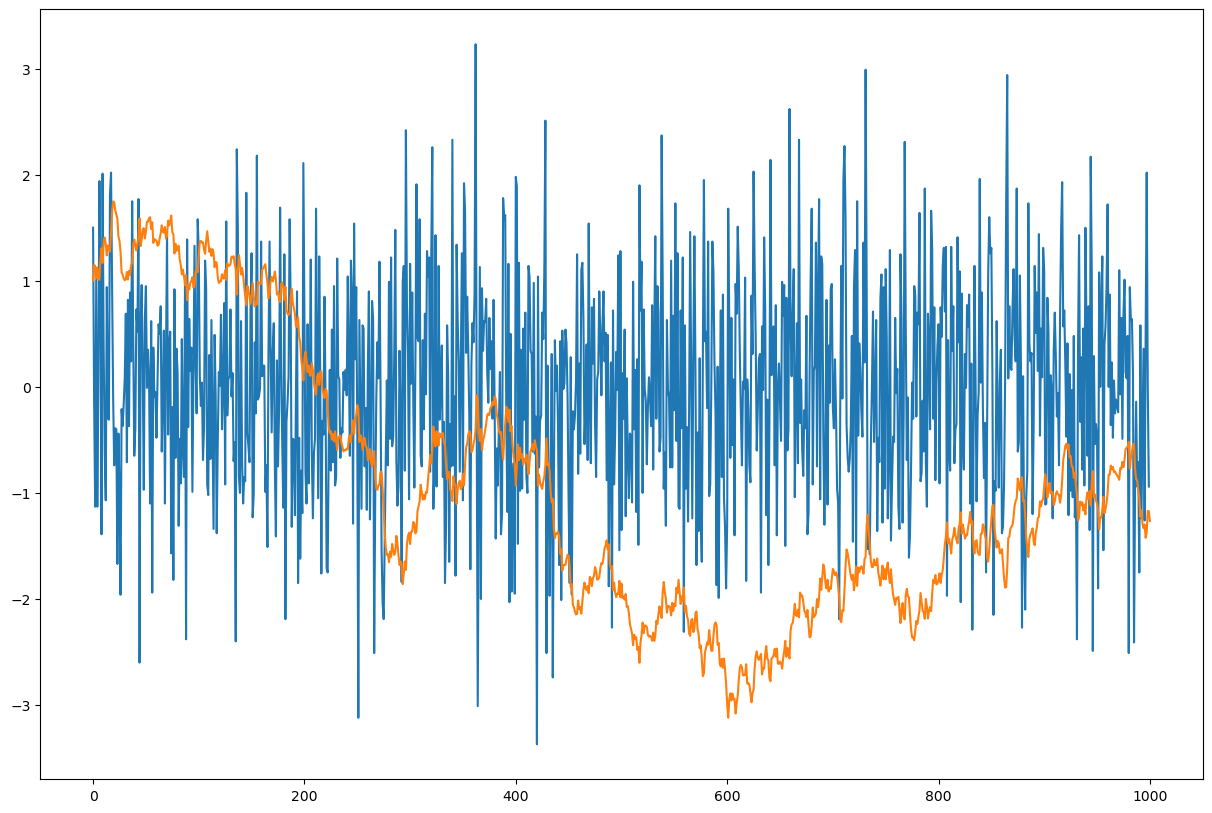

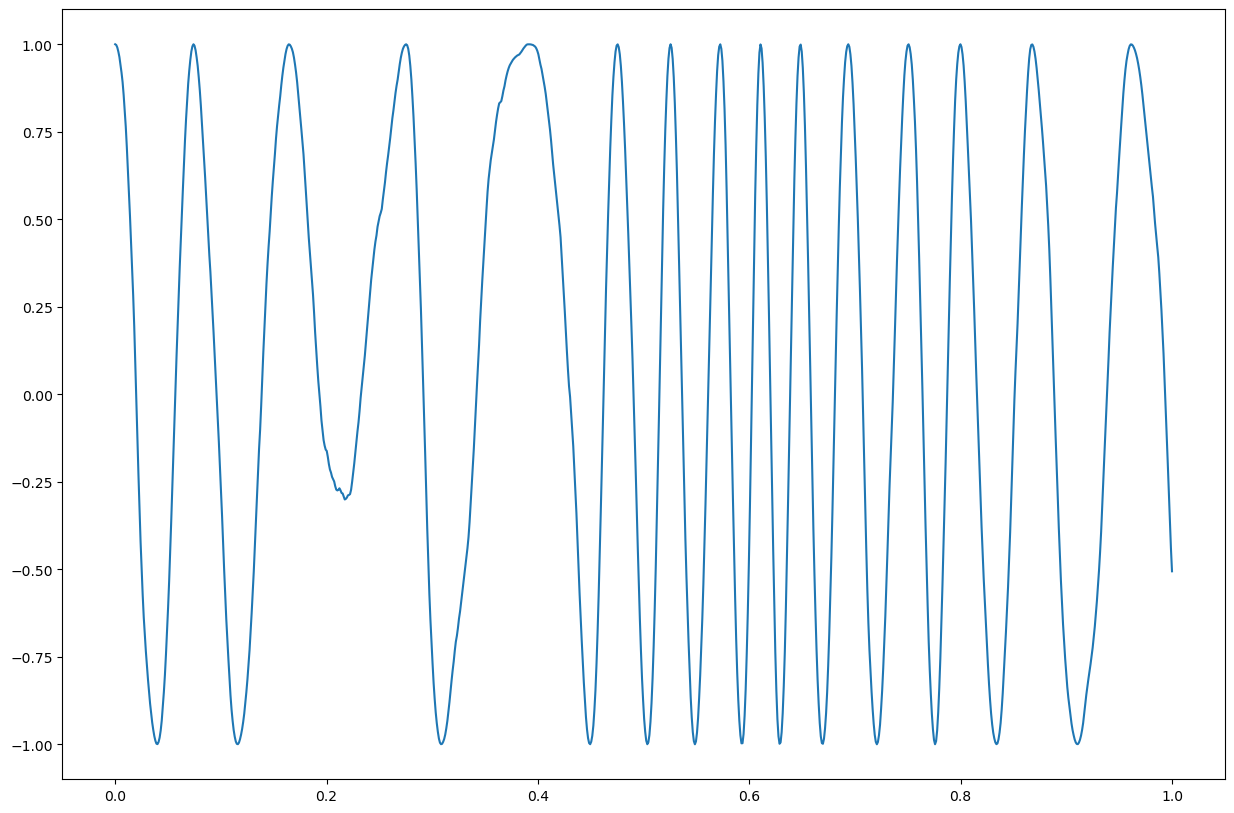

In [33]:
plt.figure(figsize=(15,10))
plt.plot(acceleration)
plt.plot(velocity)
plt.show()

plt.figure(figsize=(15,10))
plt.plot(t,sine_signal)
# plt.xlim([0.6,0.9])
plt.show()